In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


bernoullipara = {'alpha': [0.01, 0.1, 0.5,1,10]}
decisionpara = {'max_depth': [3, 5, 10,15,20,50]}
knnpara = {'n_neighbors': [2,4,5,9,15]}
logisticpara = {'C': [0.01, 0.1, 1, 10, 100]}
randompara = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10,15,20,50]}
svmpara = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

models = [
    (BernoulliNB(),bernoullipara),
    (DecisionTreeClassifier(),decisionpara),
    (KNeighborsClassifier(),knnpara),
    (LogisticRegression(),logisticpara),
    (RandomForestClassifier(), randompara),
    (SVC(), svmpara)
]

mnames=['Bernoulli','Decision','Kneighbors','logistic','Random','SVC']
table = pd.DataFrame(mnames, columns=['Models'])

In [2]:
df1 = pd.read_csv('Creditcard_data.csv')

In [3]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
classes=df1.Class.value_counts(sort= True)
classes

0    763
1      9
Name: Class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

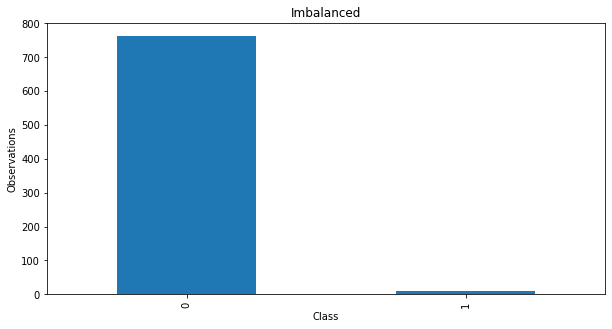

In [5]:
plt.figure(figsize=(10,5))
classes.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Observations')
plt.title('Imbalanced')
plt.show

In [6]:
y=df1['Class']
X=df1.drop('Class',axis=1)
#We can use over and under sampling to make data balanced. 
# I used SMOTE to oversample my data as undersampling is not a good choice here (size only 18). which is very less to train our data after making a sample out of it 
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state = 2)
X_new,y_new = smot.fit_resample(X,y)
y_new.value_counts()


0    763
1    763
Name: Class, dtype: int64

In [7]:
df_new=pd.concat([X_new,y_new],axis=1)
classify_new=df_new.Class.value_counts(sort= True)
classify_new

0    763
1    763
Name: Class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

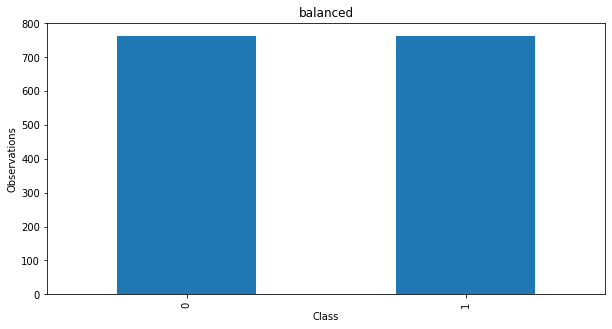

In [8]:
plt.figure(figsize=(10,5))
classify_new.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Observations')
plt.title('balanced')
plt.show

Simple Random Sampling

In [9]:
np.random.seed(0)
z = 1.96 
p=0.5
e=0.05
simple_size = int((z**2 *p * (1-p))/0.05**2)
print(simple_size)
simple_Sample = df_new.sample(n=simple_size, random_state=0)
print(simple_Sample)
 


384
      Time        V1        V2        V3        V4        V5        V6  \
1361   389 -1.207761 -1.330960  1.696821  0.748215  1.835482  0.463235   
511    377  1.166919  0.027049  0.513875  0.860965 -0.519452 -0.681147   
9        9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
393    284 -0.810756  0.654499  2.217257  0.104341 -0.286801  0.117833   
471    346  1.077079  0.284980  0.007731  1.657073  0.052020  0.446389   
...    ...       ...       ...       ...       ...       ...       ...   
829    240 -0.677673  0.992140 -0.197271  1.337549  0.399417 -0.276864   
530    394  1.293053  0.457969 -1.940450  0.173149  2.609570  3.014117   
1363     1  1.178929  0.269444  0.169779  0.444303  0.068837 -0.078502   
795    277 -0.476912  0.399679  0.675193 -0.119410  0.852615  0.086466   
1370   494 -1.078786  0.333963  1.638110  0.026614  0.957878 -0.787730   

            V7        V8        V9  ...       V21       V22       V23  \
1361 -1.190303  0.540326  0.545271

In [10]:
#Chat gpt was used here as this is a new technique of merging columns with a merge indicator which i was not awar eof
#population - sample = test sample
merged = pd.merge(df_new, simple_Sample, how='left', indicator=True)

remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
remaining

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.800000,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,264,0.382945,0.369423,0.877133,0.489226,0.162918,-1.002651,0.403228,-0.184363,-0.035655,...,-0.146214,-0.387687,-0.026119,0.357784,0.285914,-0.124410,-0.055746,-0.031683,2.014954,1
1525,555,0.492592,-0.261778,0.445946,0.974898,-0.052258,-1.067008,0.135417,-0.184951,-0.036315,...,-0.118124,-0.597211,0.349717,0.229828,0.231558,0.051743,-0.063206,0.031801,95.161340,1
1526,278,-1.208271,1.420871,-1.050221,2.879562,-0.338765,-1.003062,-1.762814,0.980029,-1.977849,...,0.283149,-0.225220,-0.286736,0.112252,0.083160,0.161475,0.176042,-0.093498,0.847480,1
1527,517,-1.721457,-1.742412,2.278205,0.890897,2.072778,0.205123,-1.332251,0.542429,0.672296,...,0.329778,0.957523,0.153190,-0.533750,-0.060457,0.518827,-0.119372,-0.159272,1.369876,1


In [11]:
y_train=simple_Sample['Class']
X_train = simple_Sample.drop('Class',axis=1)
X_test = remaining.drop('Class',axis=1)
y_test = remaining['Class']

In [12]:
y_train.value_counts()

0    200
1    184
Name: Class, dtype: int64

In [13]:
y_test.value_counts()

1    579
0    558
Name: Class, dtype: int64

In [14]:
simple_accuracy=[]
for model, para in models:
    grid = GridSearchCV(model, para, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    
    accuracy = best_model.score(X_test, y_test)
    simple_accuracy.append(accuracy)

{'alpha': 0.5}
{'max_depth': 15}
{'n_neighbors': 2}


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
{'max_depth': 10, 'n_estimators': 200}
{'C': 100, 'gamma': 0.001}


In [15]:
table['simple'] = simple_accuracy
table

,Models,simple
0,Bernoulli,0.848725
1,Decision,0.940193
2,Kneighbors,0.803870
3,logistic,0.913808
4,Random,0.992084
5,SVC,0.871592


Systematic Sampling

In [16]:
np.random.seed(1)
import pandas as pd
import math

n = len(df1)
m = int(math.sqrt(n))
print(m)
#evry m row 
system_sample = df_new.iloc[::m]
print(system_sample)
 


27
      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
27      23  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
54      37  1.295668  0.341483  0.081505  0.566746 -0.110459 -0.766325   
81      52  1.147369  0.059035  0.263632  1.211023 -0.044096  0.301067   
108     73  1.162281  1.248178 -1.581317  1.475024  1.138357 -1.020373   
135     84  1.119272 -0.669639  0.803807 -0.651693 -1.395666 -0.800698   
162    103 -0.940893  1.074155  1.759398 -0.601446  0.101693 -0.188520   
189    124 -1.710935 -1.366799  2.217311  0.404714 -0.114375 -0.075942   
216    142  1.288256  0.085828 -1.179482  0.064357  2.195225  3.383363   
243    164 -0.433211  1.020835  2.019730  3.003261  0.031308  0.187063   
270    190 -0.549414  0.676861  2.151950  1.014523 -0.620012  0.076154   
297    211 -0.247827 -0.282682  1.653354 -1.014865 -0.680433  0.886364   
324    237  1.260248 -0.020172 -1.1

In [17]:
merged = pd.merge(df_new, system_sample, how='left', indicator=True)
remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
remaining
y_train=system_sample['Class']
X_train = system_sample.drop('Class',axis=1)
X_test = remaining.drop('Class',axis=1)
y_test = remaining['Class']

In [18]:
y_train.value_counts()

0    29
1    28
Name: Class, dtype: int64

In [19]:
system_accuracy=[]
for model, para in models:
    grid = GridSearchCV(model, para, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    
    accuracy = best_model.score(X_test, y_test)
    system_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'alpha': 10}
BernoulliNB accuracy: 77.33%
{'max_depth': 3}
DecisionTreeClassifier accuracy: 86.25%
{'n_neighbors': 15}
KNeighborsClassifier accuracy: 63.78%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
LogisticRegression accuracy: 84.34%
{'max_depth': 15, 'n_estimators': 500}
RandomForestClassifier accuracy: 91.56%
{'C': 1, 'gamma': 0.01}
SVC accuracy: 67.73%


In [20]:
table['system'] = system_accuracy
table

,Models,simple,system
0,Bernoulli,0.848725,0.773315
1,Decision,0.940193,0.862491
2,Kneighbors,0.803870,0.637849
3,logistic,0.913808,0.843431
4,Random,0.992084,0.915589
5,SVC,0.871592,0.677332


Stratified Sampling

In [21]:
np.random.seed(1)
import pandas as pd
import math

strata = 'Class'
# Determine the number of strata based on the unique values of the stratification variable
S = df_new[strata].nunique()

z = 1.96 
e=0.05


In [25]:
#proportionate stratification:

sample_size = {}
for i in range(S):
    N = len(df_new[df_new[strata] == i])
    p = df_new[df_new[strata] == i][strata].sum() / N 
    n = np.ceil((z**2 * p * (1 - p)) / ((e / S)**2 ))
    sample_size[i] = max(int(n), 200)


sample_size

{0: 200, 1: 200}

In [26]:
stratified_sample = pd.concat([df_new.loc[df_new[strata] == i].sample(n=sample_size[i], random_state=42) for i in range(S)])
merged = pd.merge(df_new, stratified_sample, how='left', indicator=True)
remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
remaining
y_train=stratified_sample['Class']
X_train = stratified_sample.drop('Class',axis=1)
X_test = remaining.drop('Class',axis=1)
y_test = remaining['Class']

In [27]:
y_train.value_counts()

0    200
1    200
Name: Class, dtype: int64

In [28]:
stratified_accuracy=[]
for model, para in models:
    grid = GridSearchCV(model, para, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    stratified_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'alpha': 0.01}
BernoulliNB accuracy: 86.36%
{'max_depth': 20}
DecisionTreeClassifier accuracy: 95.90%
{'n_neighbors': 2}
KNeighborsClassifier accuracy: 80.84%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
LogisticRegression accuracy: 90.11%
{'max_depth': 10, 'n_estimators': 100}
RandomForestClassifier accuracy: 98.84%
{'C': 100, 'gamma': 0.001}
SVC accuracy: 90.37%


In [29]:
table['stratified'] = stratified_accuracy
table

,Models,simple,system,stratified
0,Bernoulli,0.848725,0.773315,0.863636
1,Decision,0.940193,0.862491,0.959002
2,Kneighbors,0.803870,0.637849,0.808378
3,logistic,0.913808,0.843431,0.901070
4,Random,0.992084,0.915589,0.988414
5,SVC,0.871592,0.677332,0.903743


CLUSTER 

In [37]:
from sklearn.cluster import KMeans
dataset= df_new
num = 8

kmeans = KMeans(n_clusters=num, random_state=42)

kmeans.fit(X_new[['Amount']])

labels = kmeans.labels_
dataset['clusters'] = labels
print("Cluster sizes:")
size_cluster =pd.Series(labels).value_counts()
size_cluster



Cluster sizes:


0    1180
7     175
4      69
3      53
5      36
1      10
6       2
2       1
dtype: int64

In [38]:
frauds = dataset.groupby('clusters')['Class'].mean()
frauds

clusters
0    0.579661
1    0.000000
2    0.000000
3    0.566038
4    0.289855
5    0.583333
6    0.000000
7    0.045714
Name: Class, dtype: float64

In [39]:
#avg size of clusters
z=1.96
e=0.05
c=0
for i in range(num):
    c=c+size_cluster[i]

c = int(c/8) 
c= round(c/len(df1),2)

c

0.25

In [40]:
sample_sizes = {}
for i in range(num):
    p_i = frauds[i]
    n_i = int(np.ceil((z**2 * p_i * (1 - p_i)) / ((e/c)**2)))
    sample_sizes[i] = n_i

sample_sizes

{0: 24, 1: 0, 2: 0, 3: 24, 4: 20, 5: 24, 6: 0, 7: 5}

In [41]:
np.random.seed(42)
selected = np.random.choice(range(num), size=int(num * 0.5), replace=False)

cluster_Sample = pd.DataFrame()
for cluster in selected:
    sample = dataset[dataset['clusters'] == cluster].sample(sample_sizes[cluster], replace=False)
    cluster_Sample = pd.concat([cluster_Sample, sample])

cluster_Sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,clusters
877,487,-2.747415,-2.428872,1.110836,1.620286,1.260144,-0.889403,0.312755,-0.020497,-0.204143,...,0.293080,1.004300,-0.281021,0.140277,-0.057841,-0.273731,-0.059391,409.184350,1,5
535,403,0.699599,-2.631727,0.661576,-0.707254,-2.261000,0.360969,-1.069656,-0.053544,-0.833647,...,0.068132,-0.499373,-0.028743,0.460852,-0.003403,0.020449,0.092994,411.880000,0,5
478,353,0.150999,-3.002120,0.824301,0.231721,-2.621415,0.128843,-0.755233,0.095956,0.638219,...,0.320297,-0.591253,0.447557,0.164080,-0.131897,-0.047547,0.130266,611.760000,0,5
593,444,0.548588,-1.106394,-0.650881,0.572799,-0.148004,0.055981,0.551553,-0.133970,-0.204957,...,-0.279628,-0.568729,-0.779207,0.507367,0.410569,-0.121734,0.056038,399.070000,0,5
990,472,-3.000916,-3.085668,1.101613,2.246211,1.351878,-1.061522,0.336726,-0.069583,-0.268357,...,0.432372,1.343044,-0.280118,0.282041,-0.151577,-0.249785,0.032510,518.361360,1,5
433,312,0.230981,-2.000483,0.555155,0.600646,-1.551024,0.242333,-0.133183,0.105984,1.248546,...,-0.610378,-0.309129,0.167024,-0.137728,0.922421,-0.113353,0.093969,493.440000,0,5
851,482,-2.843333,-2.664819,1.103589,1.836774,1.292425,-0.946223,0.316907,-0.035817,-0.225783,...,0.339204,1.124686,-0.285161,0.185469,-0.086190,-0.266942,-0.028569,447.993824,1,5
1328,476,-2.954564,-2.938436,1.095185,2.087824,1.329860,-1.012114,0.321723,-0.053583,-0.250879,...,0.392691,1.264292,-0.289963,0.237876,-0.119064,-0.259070,0.007173,492.999212,1,5
235,156,-3.494861,-2.894450,1.637989,-0.274976,-0.389203,-0.703275,0.444194,0.154266,0.695818,...,-0.063521,0.676254,0.596377,0.114229,0.834915,0.309675,0.632261,500.000000,0,5
1435,488,-2.331237,-2.574044,0.959037,2.024008,1.075365,-1.065263,0.287270,-0.091393,-0.223688,...,0.227457,1.169242,-0.188325,0.270081,-0.105658,-0.214588,0.034966,441.609384,1,5


In [42]:
merged = pd.merge(df_new, cluster_Sample, how='left', indicator=True)
df_remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
df_remaining
y_train=cluster_Sample['Class']
X_train = cluster_Sample.drop('Class', axis=1)
X_test = df_remaining.drop('Class',axis=1)
y_test = df_remaining['Class']

In [43]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,clusters
877,487,-2.747415,-2.428872,1.110836,1.620286,1.260144,-0.889403,0.312755,-0.020497,-0.204143,...,0.470798,0.293080,1.004300,-0.281021,0.140277,-0.057841,-0.273731,-0.059391,409.184350,5
535,403,0.699599,-2.631727,0.661576,-0.707254,-2.261000,0.360969,-1.069656,-0.053544,-0.833647,...,0.049882,0.068132,-0.499373,-0.028743,0.460852,-0.003403,0.020449,0.092994,411.880000,5
478,353,0.150999,-3.002120,0.824301,0.231721,-2.621415,0.128843,-0.755233,0.095956,0.638219,...,0.521719,0.320297,-0.591253,0.447557,0.164080,-0.131897,-0.047547,0.130266,611.760000,5
593,444,0.548588,-1.106394,-0.650881,0.572799,-0.148004,0.055981,0.551553,-0.133970,-0.204957,...,0.212745,-0.279628,-0.568729,-0.779207,0.507367,0.410569,-0.121734,0.056038,399.070000,5
990,472,-3.000916,-3.085668,1.101613,2.246211,1.351878,-1.061522,0.336726,-0.069583,-0.268357,...,0.649700,0.432372,1.343044,-0.280118,0.282041,-0.151577,-0.249785,0.032510,518.361360,5
433,312,0.230981,-2.000483,0.555155,0.600646,-1.551024,0.242333,-0.133183,0.105984,1.248546,...,0.079669,-0.610378,-0.309129,0.167024,-0.137728,0.922421,-0.113353,0.093969,493.440000,5
851,482,-2.843333,-2.664819,1.103589,1.836774,1.292425,-0.946223,0.316907,-0.035817,-0.225783,...,0.532632,0.339204,1.124686,-0.285161,0.185469,-0.086190,-0.266942,-0.028569,447.993824,5
1328,476,-2.954564,-2.938436,1.095185,2.087824,1.329860,-1.012114,0.321723,-0.053583,-0.250879,...,0.604337,0.392691,1.264292,-0.289963,0.237876,-0.119064,-0.259070,0.007173,492.999212,5
235,156,-3.494861,-2.894450,1.637989,-0.274976,-0.389203,-0.703275,0.444194,0.154266,0.695818,...,0.017010,-0.063521,0.676254,0.596377,0.114229,0.834915,0.309675,0.632261,500.000000,5
1435,488,-2.331237,-2.574044,0.959037,2.024008,1.075365,-1.065263,0.287270,-0.091393,-0.223688,...,0.504612,0.227457,1.169242,-0.188325,0.270081,-0.105658,-0.214588,0.034966,441.609384,5


In [44]:
y_train.value_counts()

0    31
1    22
Name: Class, dtype: int64

In [46]:
cluster_accuracy=[]
for model, para in models:
    grid = GridSearchCV(model, para, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    cluster_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'alpha': 0.01}
BernoulliNB accuracy: 63.00%
{'max_depth': 50}
DecisionTreeClassifier accuracy: 65.58%
{'n_neighbors': 2}
KNeighborsClassifier accuracy: 54.51%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 10}
LogisticRegression accuracy: 68.23%
{'max_depth': 3, 'n_estimators': 100}
RandomForestClassifier accuracy: 73.32%
{'C': 10, 'gamma': 0.01}
SVC accuracy: 63.68%


In [47]:
table['cluster'] = cluster_accuracy
table

,Models,simple,system,stratified,cluster
0,Bernoulli,0.848725,0.773315,0.863636,0.630007
1,Decision,0.940193,0.862491,0.959002,0.655804
2,Kneighbors,0.803870,0.637849,0.808378,0.545146
3,logistic,0.913808,0.843431,0.901070,0.682281
4,Random,0.992084,0.915589,0.988414,0.733198
5,SVC,0.871592,0.677332,0.903743,0.636796


Normal splitting

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=20)


In [49]:
normal_accuracy=[]
for model, para in models:
    grid = GridSearchCV(model, para, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    normal_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'alpha': 0.5}
BernoulliNB accuracy: 84.93%
{'max_depth': 50}
DecisionTreeClassifier accuracy: 98.03%
{'n_neighbors': 2}
KNeighborsClassifier accuracy: 84.06%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
LogisticRegression accuracy: 92.14%
{'max_depth': 50, 'n_estimators': 200}
RandomForestClassifier accuracy: 99.34%
{'C': 100, 'gamma': 0.001}
SVC accuracy: 92.58%


In [50]:
table['normal'] = normal_accuracy
table

,Models,simple,system,stratified,cluster,normal
0,Bernoulli,0.848725,0.773315,0.863636,0.630007,0.849345
1,Decision,0.940193,0.862491,0.959002,0.655804,0.980349
2,Kneighbors,0.803870,0.637849,0.808378,0.545146,0.840611
3,logistic,0.913808,0.843431,0.901070,0.682281,0.921397
4,Random,0.992084,0.915589,0.988414,0.733198,0.993450
5,SVC,0.871592,0.677332,0.903743,0.636796,0.925764


In [51]:
table = table.set_index('Models')
table

,simple,system,stratified,cluster,normal
Models,,,,,
Bernoulli,0.848725,0.773315,0.863636,0.630007,0.849345
Decision,0.940193,0.862491,0.959002,0.655804,0.980349
Kneighbors,0.803870,0.637849,0.808378,0.545146,0.840611
logistic,0.913808,0.843431,0.901070,0.682281,0.921397
Random,0.992084,0.915589,0.988414,0.733198,0.993450
SVC,0.871592,0.677332,0.903743,0.636796,0.925764


max accuracy :


The random forest model gives best accuracy for all models 